# Removing outliers - outlier trimming

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

In this notebook, we will remove observations that are beyond certain limits.

We we calculate those limits using:

- The IQR proximity rule
- The normal distribution
- The quantiles

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [3]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81


In [6]:
def plot_distribution(data: pd.DataFrame, variable: str):
    """
    Plots a boxplot and histogram for a given variable to visualize its distribution.

    Args:
        data: The pandas DataFrame containing the data.
        variable: The name of the column (variable) to plot.
    """
    # Create a figure with two subplots that share the x-axis
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2, 
        sharex=True, 
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=(8, 6)
    )

    # Add a title for the entire figure
    f.suptitle(f"Distribution of '{variable}'", fontsize=16)

    # Create a boxplot on the top subplot
    sns.boxplot(x=data[variable], ax=ax_box)
    # Create a histogram on the bottom subplot
    sns.histplot(data=data, x=variable, ax=ax_hist, kde=True)

    plt.show()

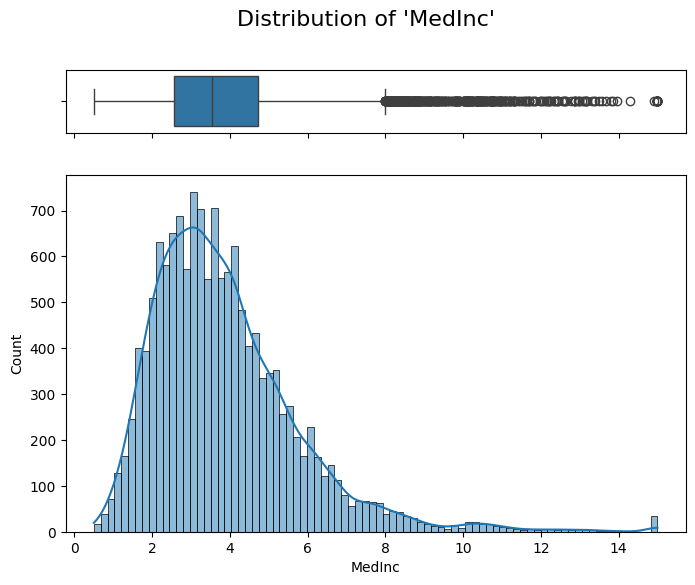

In [7]:
plot_distribution(X_train, "MedInc")

## IQR

In [8]:
def find_limits(df, variable, fold):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_limit = df[variable].quantile(0.25) - (IQR * fold)
    upper_limit = df[variable].quantile(0.75) + (IQR * fold)

    return lower_limit, upper_limit

In [9]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)
lower_limit, upper_limit

(np.float64(-3.925900000000002), np.float64(11.232600000000001))

In [10]:
# Remove outliers on the left

# ge: greater or equal than ==> True/False vector

inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [11]:
# Remove outliers on the right

# le: lower or equal than ==> True/False vector

inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [12]:
X_train.shape, X_test.shape

((14348, 8), (6151, 8))

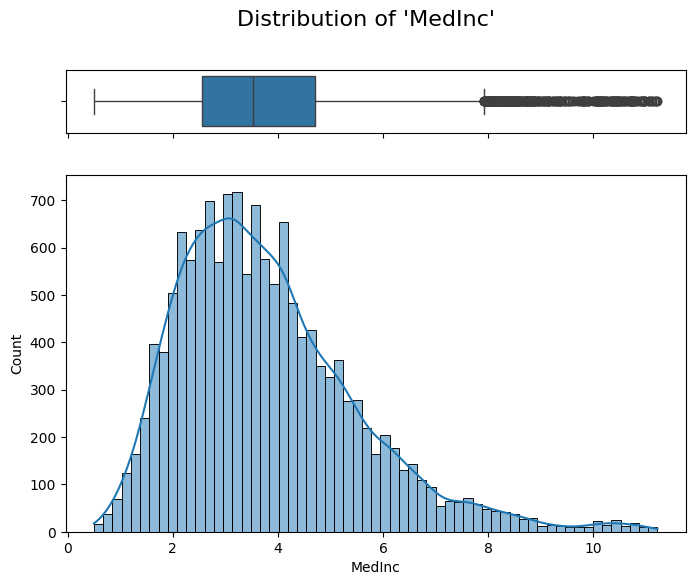

In [13]:
plot_distribution(X_train, "MedInc")

The moment we remove outliers, all the statistical parameters of the distribution change, and we could again see outliers. Hence, removing real outliers is not so straightforward.

## Normal distribution

In [12]:
def find_limits(df, variable, fold):

    lower_limit = df[variable].mean() - (df[variable].std() * fold)
    upper_limit = df[variable].mean() + (df[variable].std() * fold)

    return lower_limit, upper_limit

The rest of the procedure is identical.

In [13]:
# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [14]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc", 3)
lower_limit, upper_limit

(-1.8068060061060955, 9.540140820613294)

In [15]:
# Remove outliers on the left

# ge: greater or equal than ==> True/False vector

inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [16]:
# Remove outliers on the right

# le: lower or equal than ==> True/False vector

inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [17]:
X_train.shape, X_test.shape

((14211, 8), (6082, 8))

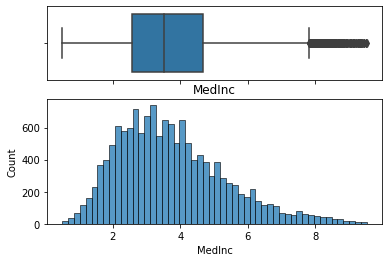

In [ ]:
plot_distribution(X_train, "MedInc")

## Quantiles

In [19]:
def find_limits(df, variable):
    lower_limit = X_train[variable].quantile(0.05)
    upper_limit = X_train[variable].quantile(0.95)
    return lower_limit, upper_limit

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [21]:
# we find the limits

lower_limit, upper_limit = find_limits(X_train, "MedInc")
lower_limit, upper_limit

(1.60152, 7.284699999999999)

In [22]:
# Remove outliers on the left

# ge: greater or equal than ==> True/False vector

inliers = X_train["MedInc"].ge(lower_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].ge(lower_limit)
X_test = X_test.loc[inliers]

In [23]:
# Remove outliers on the right

# le: lower or equal than ==> True/False vector

inliers = X_train["MedInc"].le(upper_limit)
X_train = X_train.loc[inliers]

inliers = X_test["MedInc"].le(upper_limit)
X_test = X_test.loc[inliers]

In [24]:
X_train.shape, X_test.shape

((13002, 8), (5557, 8))

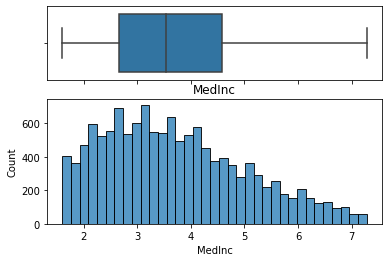

In [ ]:
plot_distribution(X_train, "MedInc")